In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from filterdesign import design_butterworth

[[ 3.39885406e-08  6.79770811e-08  3.39885406e-08  1.00000000e+00
  -1.63753805e+00  7.65916953e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.61134149e+00  7.78338948e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.69626113e+00  7.93599850e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.63153265e+00  8.37452509e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.76736637e+00  8.44497810e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.83786532e+00  9.04188502e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.70103376e+00  9.38174744e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.90474154e+00  9.67256881e-01]]
[[ 9.18074776e+05 -1.83614955e+06  9.18074776e+05  1.00000000e+00
   1.99765936e+00  9.97670718e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
   1.99777568e+00  9.977

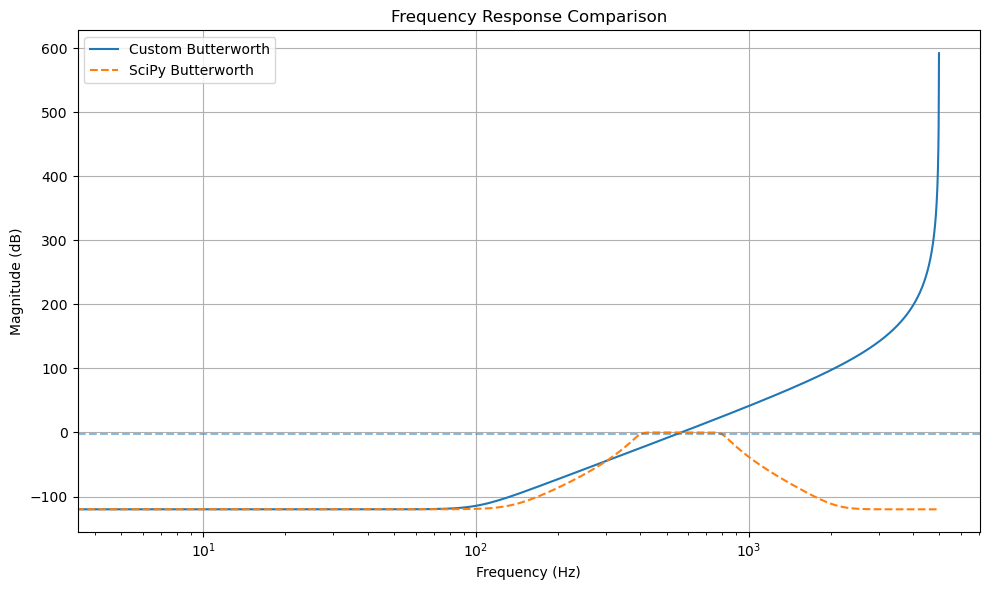

In [57]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

# === Your custom Butterworth function ===
# Include the `design_butterworth()` function from above here

# === Validation setup ===
fs = 10000           # Sampling frequency (Hz)
order = 8       # Filter order
cutoff = (400, 800)     # Lowpass cutoff (Hz)
ftype = 'bandpass'   # Filter type

# Your custom filter coefficients (SOS)
custom_sos = design_butterworth(order, ftype, fs, f1=cutoff[0], f2=cutoff[1])

# SciPy reference filter (matched settings)
nyq = fs / 2
scipy_sos = signal.butter(order, cutoff, btype=ftype, output='sos', fs=fs)

import numpy
print(numpy.array(scipy_sos))
print(numpy.array(custom_sos))

# === Frequency response comparison ===
def plot_sos_response(sos, label, style='-'):
    w, h = signal.sosfreqz(sos, worN=1024, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h) + 1e-6), style, label=label)

plt.figure(figsize=(10, 6))
plot_sos_response(custom_sos, 'Custom Butterworth')
plot_sos_response(scipy_sos, 'SciPy Butterworth', '--')
plt.title('Frequency Response Comparison')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Magnitude (dB)')
#plt.axvline(cutoff, ls='--', alpha=0.5)
#plt.axvline(cutoff*2, ls='--', alpha=0.5)
plt.axhline(-3.0, ls='--', alpha=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()